**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but unfortunately there are some problems that need to be fixed before the project can be accepted. Good luck!

<div class="alert alert-info">

Hi Dmitry, Thank you for your thorough review and good tips. unfortunatly, I did not make it to the required score.
    
I made many changes
1. Went back to OHE

2. I used stratified split

3. Changed the scoring method in GridSearchCV to f1
    
4. Changed the parameters options I provided to GridSearchCV and thus improved a lot my model hyperparameters

5. Trained the model on combined training and validation sets
    
6. Tried tuning the threshold, and found that as the threshold is getting higher (from 0), all the scores are falling and it means that something is wrong. I don't know what is it.    

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
  
You did a fantastic job improving the project! I was surprised that nothing helped to improve the test set score, so I carefully looked through your project again and found the problem: scaling was not applied to the test set. It must have been really frustrating, so I'm very sorry I missed this in the first review (it just didn't register for some reason, I was pretty sure that you just applied scaling to each of the three subsets successively)!
	  
</div>

<div class="alert alert-info">
<b>Student's comment V2</b>    

Hi Dmitry, Thank you! I think I wasn't sure if scaling should be applied also to the test set. I was so carefull about tuching it... Now it looks obvious.
Yes, it was frustrating, but I learned a lot from it :)

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
Ok, I'm glad that the project can be accepted now, and you can move on to the next srpint! Well done!
	  
</div>

#### Importing Python libraries

In [101]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: imbalanced-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.8.1)
Note: you may need to restart the kernel to use updated packages.


In [102]:
!pip install -q --upgrade pandas

In [103]:
# Basic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.dummy import DummyClassifier

# Supervised Learning Project
### Project Description:

Beta Bank is suffering continual customer churn. they decided to invest in customer preservation and the first step is tring to predict customers' churn.

Our goal in this project is to develop a model that would analyze the data on bank's clients behavior and predict whether a customer will leave the bank soon.

The model will be trained based on data about clients’ past behavior and termination of contracts with the bank.

We should develop a model with the maximum possible F1 score. F1 score should be at least 0.59

Every observation in the dataset contains information about one customer.

The information given is as follows:

Features:

- RowNumber — data string index
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — period of maturation for a customer’s fixed deposit (years)
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary

Target:

- Exited — сustomer has left

<a id="contents"></a>
# Table of contents

- [Step 1](#step1) Data loading and preprocessing
- [Step 2](#step2) Model training & validation
- [Step 3](#step3) Improve the quality of the model, taking into account the imbalance of classes.
- [Step 4](#step4) Check the quality of the model using the test set.

<a id="step1"></a>
## Step 1. Data loading and preprocessing

[back to table of contents](#contents)

### Download and study the data

In [104]:
# Downloading the file and saving the data in a datafarme
try:
    churn_data     = pd.read_csv('/datasets/Churn.csv')
except:
    churn_data     = pd.read_csv('Churn.csv' , encoding = "ISO-8859-1") 

In [105]:
churn_data.shape

(10000, 14)

In [106]:
churn_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [107]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [108]:
churn_data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [109]:
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

How is the target distributed?

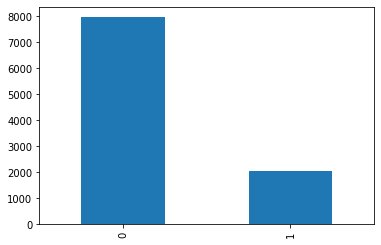

In [110]:
churn_data.Exited.value_counts().plot.bar();

How are the features distributed? are there any outliers?

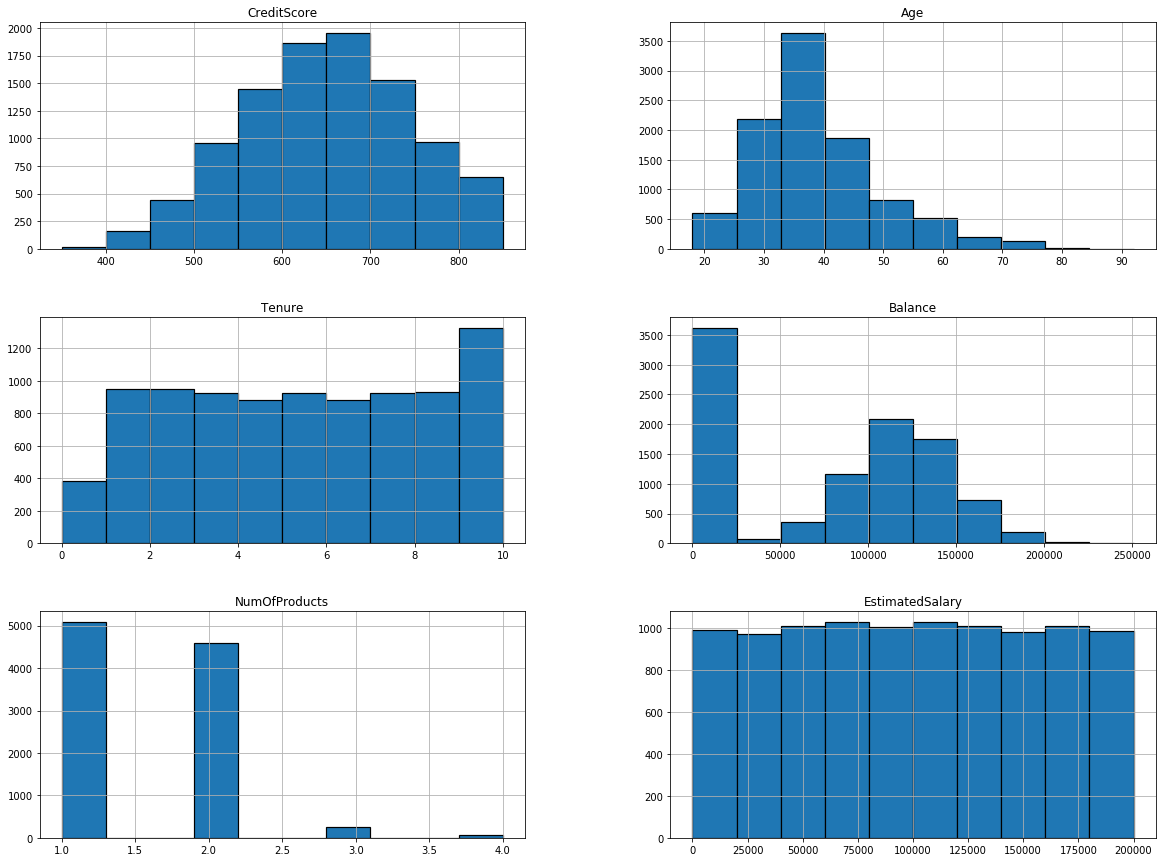

In [111]:
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
churn_data[numeric].hist(edgecolor='black', linewidth=1.2, figsize=(20,15));

In [112]:
# Calculating 95 and 99 percentiles of the Balance:
print(np.percentile(churn_data['Balance'], [95, 99])) 

[162711.669  185967.9854]


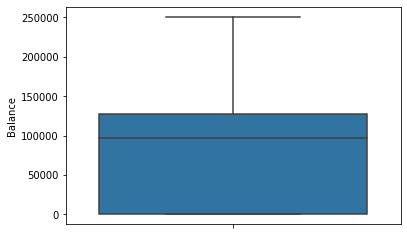

In [113]:
# Balance boxplot; I want to determine if these are ectually outliers
sns.boxplot(y='Balance', data=churn_data);

#### Summary
- We have 10,000 observations in our sample
- There are 909 rows with null value in 'Tenure' column.
- There are 2 categoricl features, 'Geography' and 'Gender', which we have to encode and convert to numeric (the model must get numerical values).
- The other features' data types are correct.
- The target is not balanced. 0 - 80%, 1 - 20%
- The featurs are distributed mainly normal.
- I checked the 'Balance' feature with box-and-wisker graph, and saw that the 95 and 99 percentile values are not outside the norml distribution boundries

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, the data was loaded and inpsected. You checked the feature and target distributions (and noted class imbalance in target)
	  
</div>

### Data preprocessing

#### Removing unnecessary columns:

In [114]:
redundant_features = ['RowNumber','CustomerId','Surname']
churn_data.drop(redundant_features, axis=1, inplace = True)

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yep, these columns can be safely dropped: there is no reasonable explanation of how they could influence target.
	  
</div>

#### Processing missing values

In [115]:
# Looking at the data of customers with null tenure feature, to find whether this phenomenon is related with some other features' values  
churn_data[churn_data['Tenure'].isna()].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


In [116]:
# I Didn't find any significant difference in other features for this population. 
# I will fill the missing values in Tenure with it's median

churn_data['Tenure'].fillna(churn_data['Tenure'].median(), inplace = True)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Missing values were dealt with reasonably!
	  
</div>

#### Encode categorical features

In [117]:
#How many different values we have in Geography?
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [118]:
#How many different values we have in Gender?
churn_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [119]:
# I decided to use label encoding, after tring OHE. since OHE method is not good for tree models and I needed tree ensemble model for better results
#encoder = OrdinalEncoder()
#data_ordinal = pd.DataFrame(encoder.fit_transform(churn_data), columns=churn_data.columns)

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Okay, that's a valid way of encoding categorical features. Although, considering there is a very small number of classes in each categorical feature, OHE wouldn't be so bad either (but you noted this yourself in the cell below, so I don't really understand why you gave up on OHE :D). There is a problem though that you are encoding all columns, rather than just categorical (this might also be one of the reasons why the final model's score dropped so much on the test set)
	  
</div>

<div class="alert alert-info">
  Ok, I went back to OHE. The reason I gave up on it in the first place, is this recommendation in the platform: "To sum everything up, encoding a categorical variable with OHE will typically result in the best performance unless:
1. It is used in a tree-based algorithm (some machine learning platforms support unencoded categorical variables for trees, but if not, Label Encoding may result in better performance in some cases)".
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Yeah, sure, although if we have 2 categorical features, each with less than 3 unique values we won't notice the difference :)
	  
</div>

In [120]:
# We will use OHE for encoding. both features have low number of values (2 and 3), so there is no danger for dummy feature trap
# Non of them is ordinal, so there's no need to worry for loosing the order
# We will do OHE before Train/Test split for simplicity

ohe_encoding = ['Geography', 'Gender']
data_ohe = pd.get_dummies(churn_data[ohe_encoding], drop_first=True)
data_ohe.head(5)

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [121]:
churn_data[ohe_encoding].head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [122]:
# We join back the OHE columns and drop the original ones
churn_data = churn_data.join(data_ohe).drop(ohe_encoding, axis=1)

In [123]:
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [124]:
# Validating the encoding
churn_data[{'Geography_Germany','Geography_Spain'}].sum()

Geography_Spain      2477
Geography_Germany    2509
dtype: int64

In [125]:
churn_data['Gender_Male'].value_counts()

1    5457
0    4543
Name: Gender_Male, dtype: int64

### Split the source data into a training set, validation set, and a test set

In [126]:
#First, we'll split the data into validation set and the rest (20%/80%)
df_rest, df_valid = train_test_split(churn_data, test_size=0.20, random_state=12345, stratify=churn_data['Exited'])

# Then, we'll split the rest data to train set and test set (25%/75%)
df_train, df_test = train_test_split(df_rest, test_size=0.25, random_state=12345, stratify=df_rest['Exited'])

In [127]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(6000, 12)
(2000, 12)
(2000, 12)


In [128]:
# declare variables for features and target feature; remove features unnecessary for the prediction
target = ['Exited']

features_train = df_train.drop(target, axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(target, axis=1)
target_valid = df_valid['Exited']
features_test = df_test.drop(target, axis=1)
target_test = df_test['Exited']

In [129]:
# Checking the proportions
target_train.value_counts()/target_train.count()

0    0.796167
1    0.203833
Name: Exited, dtype: float64

In [130]:
target_valid.value_counts()/target_valid.count()

0    0.7965
1    0.2035
Name: Exited, dtype: float64

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
The data was split into train, validation and test sets. The proportions are reasonable. Considering class imbalance, I would suggest using a stratified split to make sure that the distribution of classes is the same in these subsets as in the original dataset.
	  
</div>

<div class="alert alert-info">
  I added stratified split as you have suggested
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Great!
	  
</div>

### Standardize the numerical features

In [131]:
# we'll use Scaling for numeric columns
scaling = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [132]:
# We will use Standard scaler: (Old value - Mean value) / Standard deviation
scaler = StandardScaler()

# We fit the scaler on TRAINING dataset in order to prevent data leakage
scaler.fit(features_train[scaling])

# We apply fitted scaler to both train and valid datasets
features_train[scaling] = scaler.transform(features_train[scaling])
features_valid[scaling] = scaler.transform(features_valid[scaling])

# Added scaling of the test datasets
features_test[scaling] = scaler.transform(features_test[scaling])

In [133]:
features_train.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5536,-0.143332,0.577533,-0.001274,-1.220573,0.797767,1,1,1.029613,0,1,1
8530,1.632702,-0.564119,-1.092954,0.435807,-0.916018,1,0,0.237986,0,0,0
1762,1.116413,-0.468981,-1.456847,1.245822,-0.916018,1,1,-0.686104,0,0,0


<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Scaling was applied correctly (although this only works in case you don't use cross-validation, for cross-validation the proper way is using [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), or better yet imblearn's [pipelines](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) which can also work correctly with upsampling/downsampling).
	  
</div>

<div class="alert alert-info">
  I will not use cross validation, since it's not required
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok!
	  
</div>

### Explain the procedure

First, we explored the data, seeking to understand the nature of the columns - features.
- Looked for null values, categorical features, the distribution of the target
- Data preprocessing:
 - Filled the missing values of 'Tenure' with the feature's median.
 - Encoded categorical features 'Geography' and 'gender'. I used One Hot Encoding 
 - Splitted the data to train, validity and test sets (60-20-20)
 - Scaling the numerical features, using standard scaler, is about standardizing the data around the same mean (0), trying to eliminate the influence of features' relative value and distribution on the model. -- will be done as part of cross-validation test 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Good!
	  
</div>

<a id="step2"></a>
## Step 2. Model training & validation

[back to table of contents](#contents)

### Examine the balance of classes. 

In [134]:
# How the target variable is distributed?

churn_share = churn_data.groupby(['Exited'])['CreditScore'].count().reset_index()
churn_share['share'] = (churn_share['CreditScore']/churn_share['CreditScore'].sum()).round(decimals=2)
churn_share

,Exited,CreditScore,share
0,0,7963,0.8
1,1,2037,0.2


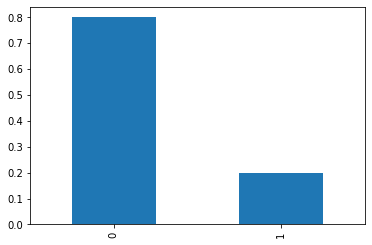

In [135]:
churn_share.share.plot.bar();

#### Summary
The data is not balanced - the exited=1 observations consist only 20% of the data, while the rest 80% are exited=0
We will have to take care of it later

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yep!
	  
</div>

### Calculating a baseline model accuracy

In [136]:
# Since we are dealing with classification task, the best constant model is the model which predict the label of the most 
# frequent class, which is in our case 0

predictions = np.zeros(len(target_valid))

In [137]:
# As can be expected, the accuracy score of the baseline model is almost 0.80 - the share of Exited=0
accuracy = accuracy_score(target_valid, predictions)
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.7965


In [138]:

f1 = f1_score(target_valid, predictions)
print("Baseline F1:", f1)

Baseline F1: 0.0


In [139]:
roc_auc = roc_auc_score(target_valid, predictions)
print("Baseline roc_auc:", roc_auc)

Baseline roc_auc: 0.5


### Train the model without taking into account the imbalance. 

In [140]:
# Logistic Regression

model = LogisticRegression(random_state=12345, solver='liblinear')

model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)

# Calculating F1 score
print('F1:', f1_score(target_valid, predicted_valid).round(decimals=4))
# roc_auc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid).round(decimals=4))

F1: 0.2991
roc_auc: 0.7749


In [141]:
# Random Forest

rf_model = RandomForestClassifier(random_state=12345)

rf_model.fit(features_train, target_train) 
predicted_valid = rf_model.predict(features_valid)

# Calculating F1 score
print('F1:', f1_score(target_valid, predicted_valid).round(decimals=4))
# roc_auc
probabilities_valid = rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid).round(decimals=4))

F1: 0.5723
roc_auc: 0.861


#### Calculating confusion matrix for Random forest model:

In [142]:
print(confusion_matrix(target_valid, predicted_valid))

[[1536   57]
 [ 221  186]]


In [143]:
print(confusion_matrix(target_valid, predicted_valid)/2000)

[[0.768  0.0285]
 [0.1105 0.093 ]]


TP = 0.093,  
TN = 0.768,  
FP = 0.0285,  
FN = 0.1105 

In [144]:
print('Recall:', recall_score(target_valid, predicted_valid).round(decimals=4))

Recall: 0.457


In [145]:
print('Precision:', precision_score(target_valid, predicted_valid).round(decimals=4))

Precision: 0.7654


### Briefly describe your findings

- The data is imbalanced. this fact has influence on the model quality, because it will naturally prefer the more frequent values
- F1 score I got for LogisticRegression is quite good - 0.5723
- True positive (0.093) and true negative values (0.768) looks ok, taking into account the sample proportions. 
- Reccall and precision metrics are also fine, but have a place for improvement

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, you trained a model without taking the class imbalance into account!
	  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Would be more interesting to include a random forest trained without taking the class imbalance into account (as this is your final model, we could see how it improved then)
	  
</div>

<div class="alert alert-info">
  Added Random forest
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Awesome!
	  
</div>

<a id="step3"></a>
## Step 3. Improve the quality of the model, taking into account the imbalance of classes.

[back to table of contents](#contents)

### Class weight adjustment

The classes of the target are imbalancd. The ratio is 20% positive/80% negative.

We can adjust it using upsampling technique, which basically duplicate the positive observations several times according to the ratio.

#### Using "class_weight" parameter

In [146]:
# Logistic Regression
lr_model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')

lr_model.fit(features_train, target_train) 
predicted_valid = lr_model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid).round(decimals=4))

probabilities_valid = lr_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid).round(decimals=4))

F1: 0.5077
roc_auc: 0.7813


- F1 score increased from 0.2991 to 0.5077! that's 70% increase!
- roc_auc increased from 0.7749 to 0.7813.

In [147]:
# Random Forest

rf_model = RandomForestClassifier(random_state=12345, class_weight='balanced')

rf_model.fit(features_train, target_train) 
predicted_valid = rf_model.predict(features_valid)

# Calculating F1 score
print('F1:', f1_score(target_valid, predicted_valid).round(decimals=4))

probabilities_valid = rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid).round(decimals=4))

F1: 0.562
roc_auc: 0.8579


- F1 score decreased from 0.5723 to 0.562 !?
- roc_auc decreased from 0.861 to 0.8579 !?

#### Using upsampling method

In [148]:
# Defining upsampling function which receives features and target sets and the N to repeat

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

# Calling the function with repeat = 4 (this is the ratio between the target classes)
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

Training the models after upsampling

In [149]:
# Logistic Regression
lr_model = LogisticRegression(random_state=12345, solver='liblinear')

lr_model.fit(features_upsampled, target_upsampled) 
predicted_valid = lr_model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid).round(decimals=4))

probabilities_valid = lr_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid).round(decimals=4))

F1: 0.5054
roc_auc: 0.7813


- F1 score increased from 0.2991 to 0.5054! that's 69% increase! just the same as with using class_weight
- roc_auc increased from 0.7749 to 0.7813 just the same as with using class_weight

In [150]:
# Random Forest

rf_model = RandomForestClassifier(random_state=12345)

rf_model.fit(features_upsampled, target_upsampled) 
predicted_valid = rf_model.predict(features_valid)

# Calculating F1 score
print('F1:', f1_score(target_valid, predicted_valid).round(decimals=4))

probabilities_valid = rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid).round(decimals=4))

F1: 0.5881
roc_auc: 0.8598


- F1 score increased from 0.5723 to 0.5881. that 3% increaes 
- roc_auc decreased from 0.861 to 0.8598 

<b>Summary:</b> since upsampling function produced better improvement on F1 score, I will continue the model training with the upsampled data

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Upsampling function looks good, it was correctly applied only to the train set and the repeat value is reasonable
	  
</div>

### choosing the best threshold

In [151]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
probabilities_one_valid

array([0.56400455, 0.12976815, 0.14673122, ..., 0.9059213 , 0.76261411,
       0.19686683])

In [152]:
for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    F1 = f1_score(target_valid, predicted_valid)
    print(
          'Threshold = {:.2f} |Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}'.format(
          threshold,  precision, recall, F1
        )
     )

Threshold = 0.00 |Precision = 0.203, Recall = 1.000, F1 = 0.338
Threshold = 0.02 |Precision = 0.203, Recall = 1.000, F1 = 0.338
Threshold = 0.04 |Precision = 0.203, Recall = 1.000, F1 = 0.338
Threshold = 0.06 |Precision = 0.203, Recall = 0.998, F1 = 0.338
Threshold = 0.08 |Precision = 0.204, Recall = 0.998, F1 = 0.339
Threshold = 0.10 |Precision = 0.206, Recall = 0.998, F1 = 0.341
Threshold = 0.12 |Precision = 0.208, Recall = 0.993, F1 = 0.344
Threshold = 0.14 |Precision = 0.211, Recall = 0.993, F1 = 0.348
Threshold = 0.16 |Precision = 0.217, Recall = 0.993, F1 = 0.356
Threshold = 0.18 |Precision = 0.223, Recall = 0.988, F1 = 0.364
Threshold = 0.20 |Precision = 0.228, Recall = 0.978, F1 = 0.370
Threshold = 0.22 |Precision = 0.234, Recall = 0.971, F1 = 0.377
Threshold = 0.24 |Precision = 0.242, Recall = 0.956, F1 = 0.386
Threshold = 0.26 |Precision = 0.253, Recall = 0.953, F1 = 0.400
Threshold = 0.28 |Precision = 0.259, Recall = 0.939, F1 = 0.406
Threshold = 0.30 |Precision = 0.268, Rec

Recall and precision scores are going the opposite ways: as the threshold grows, recall decrease and precision increase. so I added F1 score which combines both of them. F1 score is highest (0.517) at two points:for threshold of 0.56 and 0.62. 
There is a trade-off between recall and accuracy at these two points. I decide to prefare the recall, not to miss any customer who might want to leave. so I go with 0.56

In [153]:
# Confusion matrix for threshold = 0.56
threshold = 0.56

predicted_valid = probabilities_one_valid > threshold

print(confusion_matrix(target_valid, predicted_valid))

# As % from total 2000 inspections
print(confusion_matrix(target_valid, predicted_valid)/2000)

[[1235  358]
 [ 140  267]]
[[0.6175 0.179 ]
 [0.07   0.1335]]


We can see that true positive rate increased from 0.093 to 0.1175, and true negative rate decrease from 0.768 to 0.7245.

This is the result of increasing the threshold. F1 score balance the two metrics.

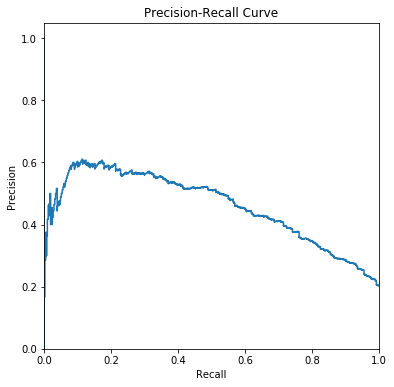

In [154]:
# Precision-Recall curve

precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
It's nice that you tuned the threshold value, printed the confusion matrix and a precision-recall curve
	  
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
There's a small problem that the task requires you to try at least two different methods of dealing with class imbalance, but there is only one tried now: upsampling
	  
</div>

<div class="alert alert-info">
  Added another method. actually, I didn't understant it from the project description. I thought it is related to training some different models...
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Huh, maybe you're seeing a different description, mine says: `Make sure you use at least two approaches to fixing class imbalance` :)
    
Anyway, thanks for adding the second approach!
	  
</div>

### Train different models and find the best one. 

#### Evaluating estimator performance with Cross-validation

In [155]:
# Logistic regression
# Runing the model over 5 folds.
#k = 5
#kf = StratifiedKFold(n_splits=k, random_state=None)
#lr = LogisticRegression(random_state=12345, solver= 'liblinear')
 
#result = cross_val_score(lr , features_upsampled, target_upsampled, cv = kf, scoring='roc_auc')
#print(result)
#print("%0.2f mean roc_auc score with a standard deviation of %0.2f" % (result.mean(), result.std()))

In [156]:
# Random Forest Classifier
#k = 5
#kf = StratifiedKFold(n_splits=k, random_state=None)
#rfc = RandomForestClassifier(random_state=12345)
 
#result = cross_val_score(rfc , features_upsampled, target_upsampled, cv = kf, scoring='roc_auc')
#print(result)
#print("%0.2f mean roc_auc score with a standard deviation of %0.2f" % (result.mean(), result.std()))

In [157]:
# Decision tree classifier
#k = 5
#kf = StratifiedKFold(n_splits=k, random_state=None)
#dtc = DecisionTreeClassifier(random_state=12345)
 
#result = cross_val_score(dtc , features_upsampled, target_upsampled, cv = kf, scoring='roc_auc')
#print(result)
#print("%0.2f mean roc_auc score with a standard deviation of %0.2f" % (result.mean(), result.std()))

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Using an upsampled dataset with cross-validation is not quite correct: the proper way is using something like imblearn's [pipelines](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html), so that the train set in each fold could be upsampled, while the validation set could not. Such a pipeline can then be passed to `cross_val_score`, `GridSearchCV` and similar functions in place of a model.
	  
</div>

<div class="alert alert-info">
 I decided not to use cross-validation for evaluating estimator performancethis time. There is no real need for it. Next time when I will use it I'll try your good advise and use pipelines.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Sure, no problem!
	  
</div>

#### Calculating F1 and roc_auc score for Decision Tree and Random Forest classifiers

In [158]:
# Decision tree classifier

dtc = DecisionTreeClassifier(random_state=12345)
dtc.fit(features_upsampled, target_upsampled)
predicted_valid = dtc.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = dtc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5053892215568863
roc_auc: 0.6911032758490385


In [159]:
# Random Forest Classifier

rfc = RandomForestClassifier(random_state=12345)
rfc.fit(features_upsampled, target_upsampled)
predicted_valid = rfc.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.5880758807588076
roc_auc: 0.8597781140154023


Random forest frovides better result in bothe metrics

The score itself is much better! but there is still a place for improve

#### Optimizing Random Forest model

In [160]:
# Let's try to improve the quality of the model by finding the best hyperparameters
parameters = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 6, 9, 12, 15]}

In [161]:
# Using GridSearchCV to find the best hyperparameters values
rfc = GridSearchCV(RandomForestClassifier(random_state=12345), parameters,scoring = 'f1')

rfc.fit(features_upsampled, target_upsampled)

print(rfc.best_estimator_)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=12345)


<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
By default `GridSearchCV` will use accuracy for classification models, while we're trying to optimize F1 score, and the hyperparameters maximizing one metric may not be the same as the hyperparameters maximizing the other
	  
</div>

<div class="alert alert-info">
 Ok!
</div>

In [162]:
predicted_valid = rfc.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one_valid))

F1: 0.6033810143042914
roc_auc: 0.8596223341986053


That's good!

#### ROC curve

In [163]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

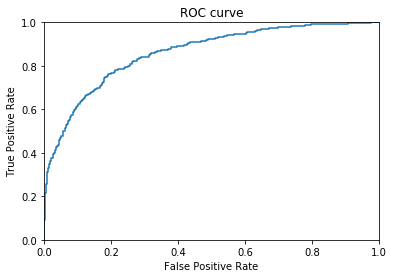

In [164]:
# Plotting ROC-curve graph
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show() 

### Briefly describe your findings.

- I adjusted the imbalanced data, using "class_weight" and upsampling techniques. I received slightly better results with upsampling.
- After that the model's score improved by 69%!
- I found out that for logistic regression, F1 score is highest (0.517) for threshold of 0.56
- F1 score for RandomForestClassifier is 0.588, which is very close to the target.
- roc_auc score: 0.73, so I decided to choose this model.
- Using GreadsearchCV I tried to find the optimal hyperparameters for the Random forest model.
- This fine tuned model F1 score is 0.603
- roc_auc score is 0.859

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Please include calculation of ROC-AUC for all models, so that we could compare how balancing techniques influence the two metrics: F1 score and ROC-AUC
	  
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>
	  
It's great that you added ROC-AUC calculation for all models, but there's a small problem that binary predictions (i.e. `predict` instead of `predict_proba`) were used to calculate ROC-AUC for most models. Unfortunately this produces an incorrect value of ROC-AUC. Remember that the ROC curve is constructed by varying the threshold of assigning positive class probability. If we use binary predictions, the curve will have just 3 points: with threshold values 0, 1, and any number in between, so it's a very rough approximation of the true ROC curve.
	  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
Corrected!
	  
</div>

<a id="step4"></a>
## Step 4. Perform the final testing.

[back to table of contents](#contents)

In [165]:
## Checking the quality of the model using the test set.
predicted_test = rfc.predict(features_test)

accuracy = accuracy_score(target_test, predicted_test)
print("Final model accuracy:", accuracy)

f1 = f1_score(target_test, predicted_test)
print("RandomForestClassifier F1:", f1)

probabilities_valid = rfc.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc = roc_auc_score(target_test, probabilities_one_valid)
print("Final model roc_auc:", roc_auc)

Final model accuracy: 0.8455
RandomForestClassifier F1: 0.5971316818774446
Final model roc_auc: 0.8561450510603051


Yasss! 0.597!

In [166]:
target_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

### Retrain the model on the combined train+validation data

In [167]:
# We join back the train and valid samples
combined_features = pd.concat([features_train]+[features_valid])
combined_target = pd.concat([target_train]+[target_valid])

In [168]:
combined_features['CreditScore'].count()

8000

In [169]:
combined_target.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

The proportions remained the same (almost, 3.9)

In [170]:
# Calling the upsample function with repeat = 4 
combined_features_upsampled, combined_target_upsampled = upsample(
    combined_features, combined_target, 4
)

In [171]:
features_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9375,0.094161,0.862946,-0.365167,0.757050,0.797767,1,0,-0.308325,1,0,1
9536,-1.031349,0.292120,1.818193,0.838881,-0.916018,1,0,-0.645029,1,0,0
6344,2.066384,0.196983,-0.729060,-1.220573,0.797767,1,0,0.498373,0,0,1
4357,1.085435,-0.278706,1.090407,-1.220573,0.797767,1,0,1.331035,0,0,1
9120,0.548495,1.814323,-0.365167,0.266421,-0.916018,0,1,-0.261760,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7831,1.023481,0.292120,-1.092954,-0.312883,0.797767,0,1,1.482797,0,0,1
9299,1.797914,-1.230083,-0.001274,1.119839,-0.916018,1,0,-1.360771,0,0,1
6361,-2.415003,-1.325220,-1.820741,0.343355,0.797767,1,1,1.048024,1,0,0
6343,-0.236264,1.528910,0.362620,-1.220573,-0.916018,0,0,-0.143680,0,1,0


In [172]:
combined_rfc = RandomForestClassifier(max_depth=12, n_estimators=150, random_state=12345)
combined_rfc.fit(combined_features_upsampled, combined_target_upsampled)
predicted_test = combined_rfc.predict(features_test)

print('F1:', f1_score(target_test, predicted_test))

probabilities_valid = combined_rfc.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

print('roc_auc:', roc_auc_score(target_test, probabilities_one_valid))

F1: 0.6291618828932263
roc_auc: 0.8661280695179


<div class="alert alert-danger">
<b>Reviewer's comment V2</b>
	  
Found the problem: the test set was not scaled the same way as the train/validation :)
	  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
Fixed!
	  
</div>

In [173]:
combined_target.value_counts()[0]/len(combined_target)

0.79625

In [174]:
target_test.value_counts()[0]/len(target_test)

0.7965

F1 = 0.629!

### Trying to find the best threshold of assigning the positive class

In [175]:
# Trying to find the best threshold of assigning the positive class
probabilities_test = combined_rfc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
probabilities_one_test

array([0.67911567, 0.81118248, 0.10843354, ..., 0.21602585, 0.94660654,
       0.6755301 ])

In [176]:
for threshold in np.arange(0, 0.7, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision_test = precision_score(target_test, predicted_test)
    recall_test = recall_score(target_test, predicted_test)
    F1_test = f1_score(target_test, predicted_test)
    print(
          'Threshold = {:.2f} |Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}'.format(
          threshold,  precision_test, recall_test, F1_test
        )
     )

Threshold = 0.00 |Precision = 0.203, Recall = 1.000, F1 = 0.338
Threshold = 0.02 |Precision = 0.205, Recall = 1.000, F1 = 0.340
Threshold = 0.04 |Precision = 0.213, Recall = 1.000, F1 = 0.351
Threshold = 0.06 |Precision = 0.228, Recall = 1.000, F1 = 0.371
Threshold = 0.08 |Precision = 0.239, Recall = 0.995, F1 = 0.385
Threshold = 0.10 |Precision = 0.253, Recall = 0.985, F1 = 0.402
Threshold = 0.12 |Precision = 0.265, Recall = 0.968, F1 = 0.416
Threshold = 0.14 |Precision = 0.278, Recall = 0.963, F1 = 0.432
Threshold = 0.16 |Precision = 0.296, Recall = 0.953, F1 = 0.452
Threshold = 0.18 |Precision = 0.311, Recall = 0.941, F1 = 0.468
Threshold = 0.20 |Precision = 0.327, Recall = 0.929, F1 = 0.484
Threshold = 0.22 |Precision = 0.341, Recall = 0.909, F1 = 0.496
Threshold = 0.24 |Precision = 0.358, Recall = 0.899, F1 = 0.512
Threshold = 0.26 |Precision = 0.374, Recall = 0.880, F1 = 0.525
Threshold = 0.28 |Precision = 0.392, Recall = 0.872, F1 = 0.541
Threshold = 0.30 |Precision = 0.407, Rec

After threshold==0 all the metrics are getting worse

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Tuning the threshold using the test set is generally not ideal (for the same reasons why we don't tune hyperparameters using the test set), better to select the threshold using the validation set, and then use it for the test set.
	  
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
The final model was evaluated on the test set, however it unfortunately doesn't pass the required F1 score threshold of 0.59. A couple of things that might help:
    
1. You can try using a stratified split. Maybe the test set ended up having a different proportion of classes than the original data.
2. You can also retrain the model on the combined train+validation data before evaluating it on the test set (you can also apply upsampling to this train+validation set, just make sure that the train set used to make this big set is the original train set, not the upsampled one)
3. Also tuning the threshold of assigning the positive class may help (as you did for one of the earlier models)
	  
</div>

<div class="alert alert-warning">
<s><b>Reviewer's comment</b>
	  
It would be nice to include some simple baseline (you can use [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) for convenience)
	  
</div>

 <div class="alert alert-info">

I made many changes
1. Went back to OHE

2. I used stratified split
    
3. <b> Added scaling for the test dataset</b>  

4. Changed the scoring method in GridSearchCV to f1
    
5. Changed the parameters options I provided to GridSearchCV and thus improved a lot my model hyperparameters

6. Trained the model on combined training and validation sets
    
7. Tried tuning the threshold
</div>